<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Tensorflow/TF_home_credit_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Data

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
path_to_zip_file='/content/drive/My Drive/Data/home-credit-default-risk.zip'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
# Training data
app_train = pd.read_csv('/content/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [5]:
app_train['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [6]:
neg, pos = np.bincount(app_train['TARGET'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 307511
    Positive: 24825 (8.07% of total)



In [7]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [10]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [11]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            #app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [12]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
#app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
#print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)


In [13]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,...,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,1.0,1,1,15,0,0,0,0,0,0,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
307507,456252,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,1.0,2,2,8,0,0,0,0,0,0,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,...,0,0,0,0,0,0,0,0,0,0,0,

In [14]:
# Create an anomalous flag column
#app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [15]:
app_train.shape

(307511, 243)

In [16]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,...,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236.0,-8456.0,-1982,NaN,1,1,0,1,0,0,1.0,1,1,15,0,0,0,0,0,0,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
307507,456252,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,NaN,-4388.0,-4090,NaN,1,0,0,1,1,0,1.0,2,2,8,0,0,0,0,0,0,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,...,0,0,0,0,0,0,0

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(app_train, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('TARGET'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('TARGET'))
test_labels = np.array(test_df.pop('TARGET'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)


In [18]:
print(train_labels.shape)
train_labels

(196806,)


array([0, 0, 0, ..., 0, 0, 0])

In [19]:
bool_train_labels

array([False, False, False, ..., False, False, False])

In [20]:
print(train_features.shape)
train_features

(196806, 242)


array([[3.48752e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [3.69003e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.72943e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.83803e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.42893e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.09160e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [21]:
# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Fit on the training data & Transform both training and testing data
imputer.fit(train_features)
train_features = imputer.transform(train_features)
val_features = imputer.transform(val_features)
test_features = imputer.transform(test_features)


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5) # if outside -5 and 5, the value become -5 or 5
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (196806,)
Validation labels shape: (49202,)
Test labels shape: (61503,)
Training features shape: (196806, 242)
Validation features shape: (49202, 242)
Test features shape: (61503, 242)


# Define the model and metrics

In [23]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

# Base line model

In [25]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [26]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                3888      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 3,905
Trainable params: 3,905
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.predict(train_features[:10])

array([[0.3316424 ],
       [0.11696538],
       [0.2136054 ],
       [0.2141994 ],
       [0.24185857],
       [0.2348684 ],
       [0.21022904],
       [0.19469988],
       [0.40708473],
       [0.21083215]], dtype=float32)

In [28]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.4479


In [29]:
print(pos,neg)

24825 282686


In [30]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.43248553])

In [31]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.10152677],
       [0.7504467 ],
       [0.22018772],
       [0.09945741],
       [0.15354392],
       [0.09487018],
       [0.46236685],
       [0.38688353],
       [0.20710313],
       [0.09746474]], dtype=float32)

In [32]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.3390


This initial loss is about 10 times less than if would have been with naive initialization.

This way the model doesn't need to spend the first few epochs just learning that positive examples are unlikely. This also makes it easier to read plots of the loss during training.

In [33]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

Confirm that the bias fix helps

Before moving on, confirm quick that the careful bias initialization actually helped.

Train the model for 20 epochs, with and without this careful initialization, and compare the losses:

In [67]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=1)

Epoch 1/20
97/97 [==============================] - 2s 20ms/step - loss: 0.4637 - tp: 18874.0000 - fp: 207454.0000 - tn: 335114.0000 - fn: 28976.0000 - accuracy: 0.5996 - precision: 0.0834 - recall: 0.3944 - auc: 0.5164 - val_loss: 0.2911 - val_tp: 51.0000 - val_fp: 157.0000 - val_tn: 45092.0000 - val_fn: 3902.0000 - val_accuracy: 0.9175 - val_precision: 0.2452 - val_recall: 0.0129 - val_auc: 0.6430
Epoch 2/20
97/97 [==============================] - 1s 12ms/step - loss: 0.3495 - tp: 890.0000 - fp: 5718.0000 - tn: 175138.0000 - fn: 15060.0000 - accuracy: 0.8944 - precision: 0.1347 - recall: 0.0558 - auc: 0.5971 - val_loss: 0.2684 - val_tp: 13.0000 - val_fp: 38.0000 - val_tn: 45211.0000 - val_fn: 3940.0000 - val_accuracy: 0.9191 - val_precision: 0.2549 - val_recall: 0.0033 - val_auc: 0.6945
Epoch 3/20
97/97 [==============================] - 1s 11ms/step - loss: 0.3195 - tp: 300.0000 - fp: 1591.0000 - tn: 179265.0000 - fn: 15650.0000 - accuracy: 0.9124 - precision: 0.1586 - recall: 0.01

In [68]:
#with carefull initial model
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=1)

Epoch 1/20
97/97 [==============================] - 2s 20ms/step - loss: 0.2824 - tp: 58.0000 - fp: 278.0000 - tn: 225827.0000 - fn: 19845.0000 - accuracy: 0.9182 - precision: 0.1726 - recall: 0.0029 - auc: 0.6444 - val_loss: 0.2601 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45249.0000 - val_fn: 3953.0000 - val_accuracy: 0.9197 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7045
Epoch 2/20
97/97 [==============================] - 1s 11ms/step - loss: 0.2656 - tp: 53.0000 - fp: 103.0000 - tn: 180753.0000 - fn: 15897.0000 - accuracy: 0.9187 - precision: 0.3397 - recall: 0.0033 - auc: 0.6841 - val_loss: 0.2549 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 45249.0000 - val_fn: 3952.0000 - val_accuracy: 0.9197 - val_precision: 1.0000 - val_recall: 2.5297e-04 - val_auc: 0.7286
Epoch 3/20
97/97 [==============================] - 1s 12ms/step - loss: 0.2600 - tp: 118.0000 - fp: 169.0000 - tn: 180687.0000 - fn: 15832.0000 - accuracy: 0.9187 - precision: 0.4111 - re

In [34]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [35]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

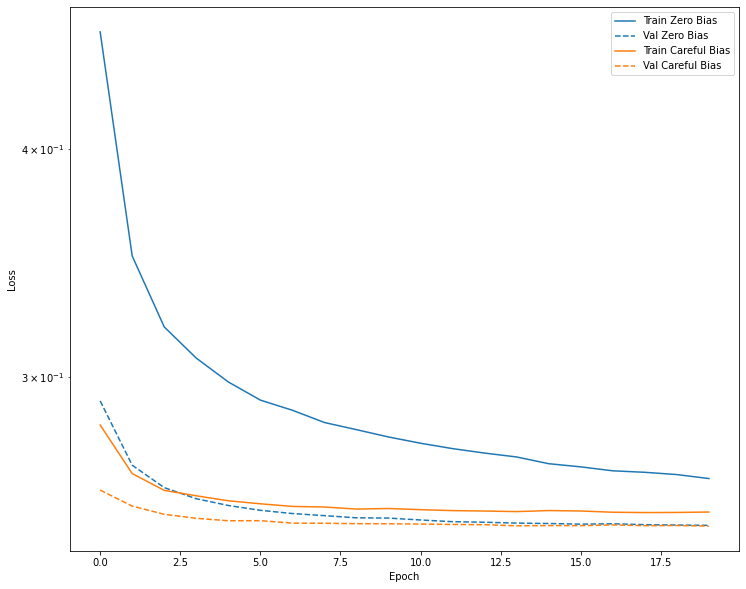

In [73]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

The above figure makes it clear: In terms of validation loss, on this problem, this careful initialization gives a clear advantage.

In [50]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
97/97 [==============================] - 2s 24ms/step - loss: 0.3048 - tp: 3627.0000 - fp: 19157.0000 - tn: 218256.0000 - fn: 17269.0000 - accuracy: 0.8590 - precision: 0.1592 - recall: 0.1736 - auc: 0.5822 - val_loss: 0.2595 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 45270.0000 - val_fn: 3926.0000 - val_accuracy: 0.9201 - val_precision: 0.5000 - val_recall: 7.6355e-04 - val_auc: 0.7017
Epoch 2/100
97/97 [==============================] - 1s 12ms/step - loss: 0.2695 - tp: 170.0000 - fp: 357.0000 - tn: 180495.0000 - fn: 15784.0000 - accuracy: 0.9180 - precision: 0.3226 - recall: 0.0107 - auc: 0.6716 - val_loss: 0.2548 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 45271.0000 - val_fn: 3926.0000 - val_accuracy: 0.9202 - val_precision: 0.6000 - val_recall: 7.6355e-04 - val_auc: 0.7246
Epoch 3/100
97/97 [==============================] - 1s 12ms/step - loss: 0.2622 - tp: 220.0000 - fp: 307.0000 - tn: 180545.0000 - fn: 15734.0000 - accuracy: 0.9185 - precision: 0.4175 - recall: 0.

In [51]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()


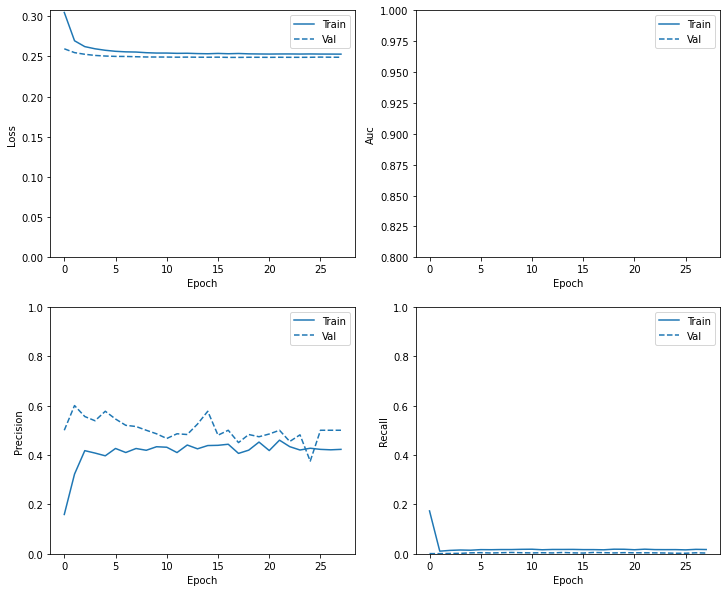

In [52]:
plot_metrics(baseline_history)

In [53]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [54]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [55]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
baseline_results

[0.2495095580816269,
 34.0,
 34.0,
 56527.0,
 4908.0,
 0.9196462035179138,
 0.5,
 0.006879805587232113,
 0.7455341815948486]

loss :  0.2495095580816269
tp :  34.0
fp :  34.0
tn :  56527.0
fn :  4908.0
accuracy :  0.9196462035179138
precision :  0.5
recall :  0.006879805587232113
auc :  0.7455341815948486

Legitimate Transactions Detected (True Negatives):  56527
Legitimate Transactions Incorrectly Detected (False Positives):  34
Fraudulent Transactions Missed (False Negatives):  4908
Fraudulent Transactions Detected (True Positives):  34
Total Fraudulent Transactions:  4942


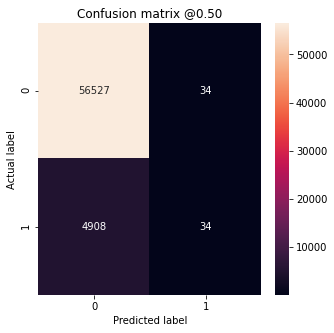

In [56]:
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [57]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

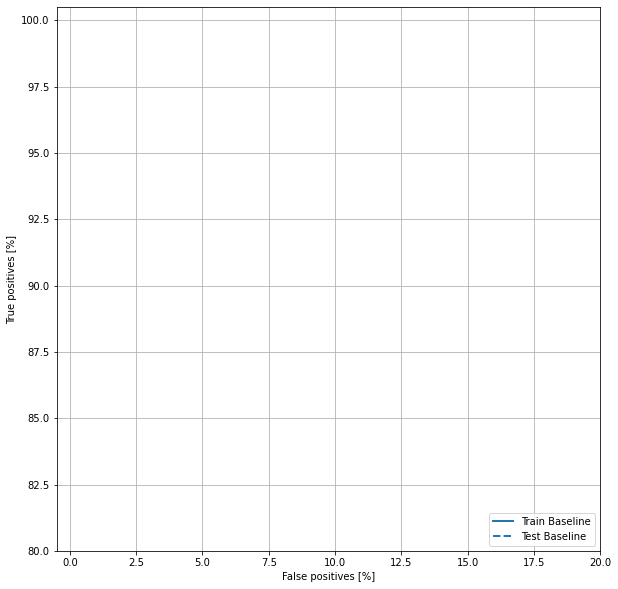

In [58]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

# Class weights

In [84]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.54
Weight for class 1: 6.19


In [85]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
97/97 [==============================] - 2s 22ms/step - loss: 0.9673 - tp: 3755.0000 - fp: 22840.0000 - tn: 214597.0000 - fn: 17117.0000 - accuracy: 0.8453 - precision: 0.1412 - recall: 0.1799 - auc: 0.6230 - val_loss: 0.4807 - val_tp: 1678.0000 - val_fp: 8483.0000 - val_tn: 36766.0000 - val_fn: 2275.0000 - val_accuracy: 0.7814 - val_precision: 0.1651 - val_recall: 0.4245 - val_auc: 0.6850
Epoch 2/100
97/97 [==============================] - 1s 12ms/step - loss: 0.7656 - tp: 6975.0000 - fp: 42902.0000 - tn: 137954.0000 - fn: 8975.0000 - accuracy: 0.7364 - precision: 0.1398 - recall: 0.4373 - auc: 0.6484 - val_loss: 0.4906 - val_tp: 1907.0000 - val_fp: 8767.0000 - val_tn: 36482.0000 - val_fn: 2046.0000 - val_accuracy: 0.7802 - val_precision: 0.1787 - val_recall: 0.4824 - val_auc: 0.7163
Epoch 3/100
97/97 [==============================] - 1s 12ms/step - loss: 0.7238 - tp: 7470.0000 - fp: 43481.0000 - tn: 137375.0000 - fn: 8480.0000 - accuracy: 0.7360 - precision: 0.1466 - re

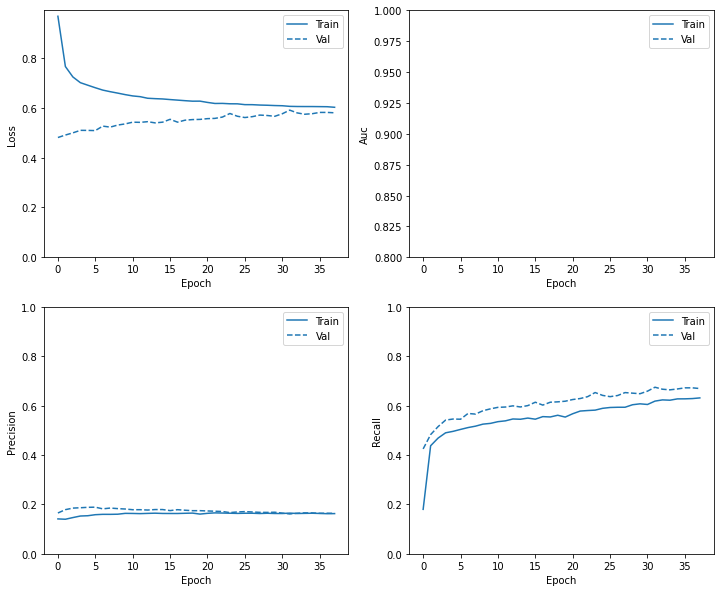

In [86]:
plot_metrics(weighted_history)

In [87]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.5702639818191528
tp :  3150.0
fp :  15956.0
tn :  40625.0
fn :  1772.0
accuracy :  0.7117539048194885
precision :  0.16486968100070953
recall :  0.6399837732315063
auc :  0.7384548783302307

Legitimate Transactions Detected (True Negatives):  40625
Legitimate Transactions Incorrectly Detected (False Positives):  15956
Fraudulent Transactions Missed (False Negatives):  1772
Fraudulent Transactions Detected (True Positives):  3150
Total Fraudulent Transactions:  4922


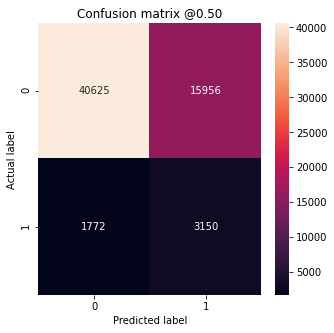

In [88]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

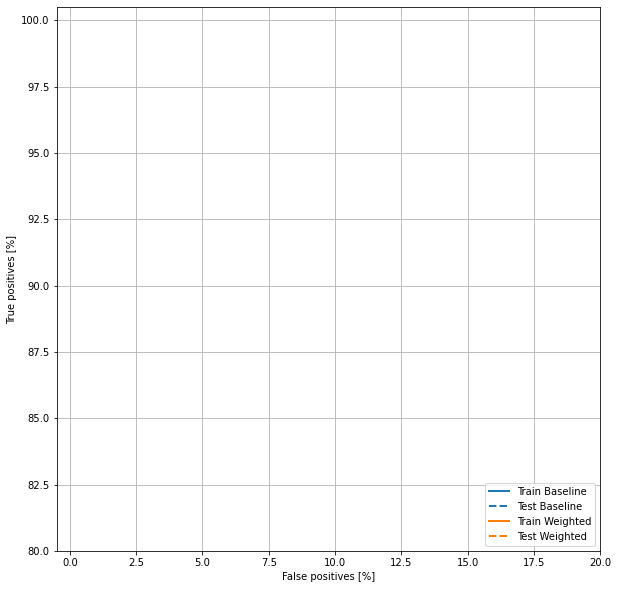

In [89]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

# Oversampling

In [39]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [40]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [41]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [ 1.34312195e-01 -3.24390911e-01  1.39143391e+00  6.64078220e-01
  2.19864790e+00 -3.13641200e-01 -9.73330086e-01 -1.08578528e+00
 -1.05513648e+00  3.12290758e-01  1.56074578e-01 -4.75223117e-01
  2.11302409e-01 -1.23550431e+00  2.73120192e-01  2.25414545e-03
  4.68722240e-01 -4.97933334e-01  4.28084650e-02 -6.25522114e-01
 -2.44879484e-01  2.03304043e+00 -1.04458373e-01 -6.39469568e-02
 -9.38653426e-01 -1.23380379e-01 -2.31149229e-01 -2.05816649e-01
  3.43432163e+00  1.82751444e+00 -4.68125436e-01  1.23456177e-02
 -1.11595081e+00  8.09402493e-01 -1.96100582e-01 -9.37975544e-02
  4.63889541e-02  1.32022340e-02 -1.64601147e-01 -3.68871277e-01
 -8.19396887e-02 -2.81654323e-01 -8.34841995e-02 -1.39987212e-01
 -1.50860148e-01 -2.06047351e-01 -9.93112673e-02 -2.33121606e-01
 -1.92662675e-01 -9.84478517e-02  4.99516104e-02  2.63798871e-02
 -1.67327749e-01 -3.56325517e-01 -4.93148502e-02 -2.65794202e-01
 -7.02792399e-02 -1.45850283e-01 -1.60925078e-01 -2.03333784e-01
 -9.41351294e-

Merge the two together using experimental.sample_from_datasets:



In [42]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [43]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5166015625


In [ ]:
# Crash Ram
#len(list(resampled_ds))

To use this dataset, you'll need the number of steps per epoch.

The definition of "epoch" in this case is less clear. Say it's the number of batches required to see each negative example once:

In [44]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

277.0

Train on the oversampled data

Now try training the model with the resampled data set instead of using class weights to see how these methods compare.

Note: Because the data was balanced by replicating the positive examples, the total dataset size is larger, and each epoch runs for more training steps.

In [45]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks = [early_stopping],
    validation_data=val_ds)

Epoch 1/100
277/277 [==============================] - 10s 36ms/step - loss: 0.6619 - tp: 198283.0000 - fp: 143545.0000 - tn: 501507.0000 - fn: 117573.0000 - accuracy: 0.7283 - precision: 0.5801 - recall: 0.6278 - auc: 0.7680 - val_loss: 0.6169 - val_tp: 2713.0000 - val_fp: 15223.0000 - val_tn: 30050.0000 - val_fn: 1216.0000 - val_accuracy: 0.6659 - val_precision: 0.1513 - val_recall: 0.6905 - val_auc: 0.7385
Epoch 2/100
277/277 [==============================] - 8s 30ms/step - loss: 0.6089 - tp: 191985.0000 - fp: 92619.0000 - tn: 191177.0000 - fn: 91515.0000 - accuracy: 0.6754 - precision: 0.6746 - recall: 0.6772 - auc: 0.7328 - val_loss: 0.6050 - val_tp: 2683.0000 - val_fp: 14589.0000 - val_tn: 30684.0000 - val_fn: 1246.0000 - val_accuracy: 0.6782 - val_precision: 0.1553 - val_recall: 0.6829 - val_auc: 0.7433
Epoch 3/100
277/277 [==============================] - 8s 30ms/step - loss: 0.6032 - tp: 190563.0000 - fp: 88097.0000 - tn: 195934.0000 - fn: 92702.0000 - accuracy: 0.6813 - pre

If the training process were considering the whole dataset on each gradient update, this oversampling would be basically identical to the class weighting.

But when training the model batch-wise, as you did here, the oversampled data provides a smoother gradient signal: Instead of each positive example being shown in one batch with a large weight, they're shown in many different batches each time with a small weight.

This smoother gradient signal makes it easier to train the model.

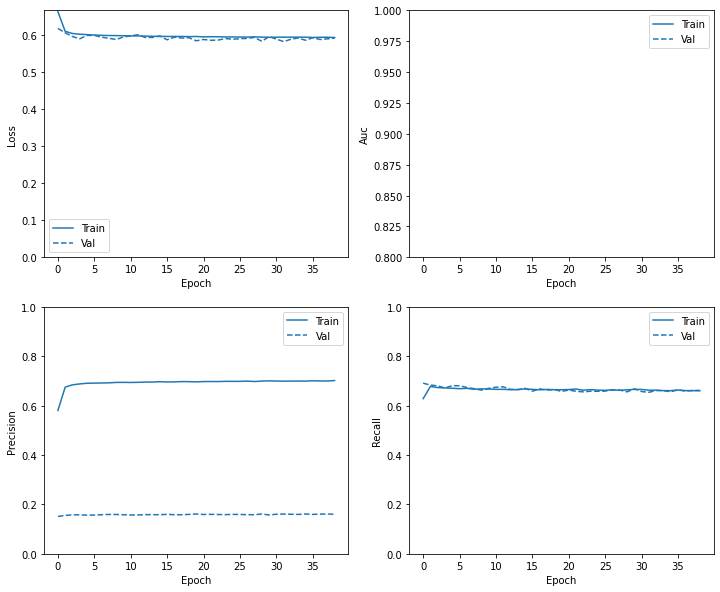

In [46]:
plot_metrics(resampled_history )

In [47]:
train_predictions_weighted = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.5806998610496521
tp :  3285.0
fp :  16523.0
tn :  40038.0
fn :  1657.0
accuracy :  0.7044046521186829
precision :  0.16584208607673645
recall :  0.6647106409072876
auc :  0.747156023979187

Legitimate Transactions Detected (True Negatives):  40038
Legitimate Transactions Incorrectly Detected (False Positives):  16523
Fraudulent Transactions Missed (False Negatives):  1657
Fraudulent Transactions Detected (True Positives):  3285
Total Fraudulent Transactions:  4942


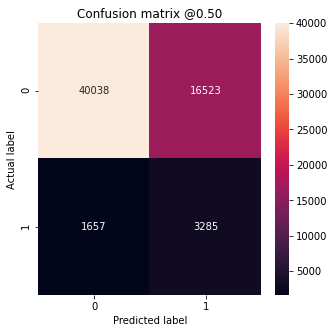

In [48]:
weighted_results = resampled_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

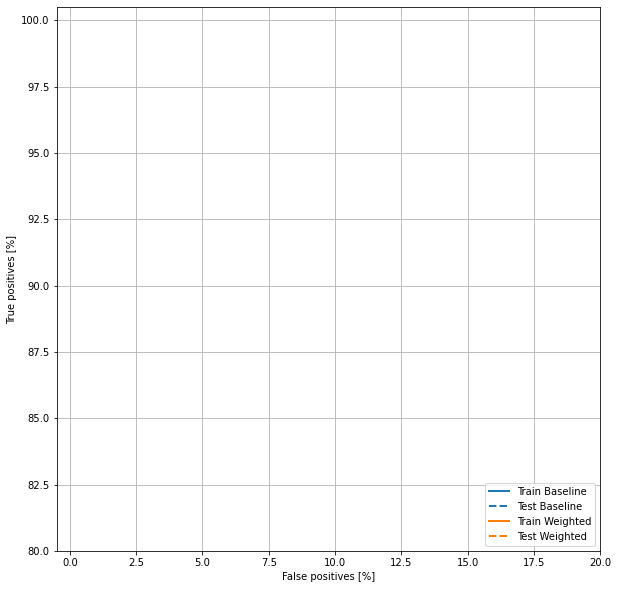

In [59]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

Because training is easier on the balanced data, the above training procedure may overfit quickly.

So break up the epochs to give the callbacks.EarlyStopping finer control over when to stop training.

In [60]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch = 20,
    epochs=10*EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 2s 78ms/step - loss: 0.8156 - tp: 15471.0000 - fp: 13870.0000 - tn: 63007.0000 - fn: 10115.0000 - accuracy: 0.7659 - precision: 0.5273 - recall: 0.6047 - auc: 0.8130 - val_loss: 0.8614 - val_tp: 3131.0000 - val_fp: 29661.0000 - val_tn: 15612.0000 - val_fn: 798.0000 - val_accuracy: 0.3809 - val_precision: 0.0955 - val_recall: 0.7969 - val_auc: 0.6178
Epoch 2/1000
20/20 [==============================] - 1s 43ms/step - loss: 0.7302 - tp: 14425.0000 - fp: 11698.0000 - tn: 8822.0000 - fn: 6015.0000 - accuracy: 0.5676 - precision: 0.5522 - recall: 0.7057 - auc: 0.5989 - val_loss: 0.7429 - val_tp: 2921.0000 - val_fp: 23399.0000 - val_tn: 21874.0000 - val_fn: 1008.0000 - val_accuracy: 0.5039 - val_precision: 0.1110 - val_recall: 0.7434 - val_auc: 0.6620
Epoch 3/1000
20/20 [==============================] - 1s 41ms/step - loss: 0.6970 - tp: 14146.0000 - fp: 10459.0000 - tn: 10026.0000 - fn: 6329.0000 - accuracy: 0.5901 - precision: 0.5749 -

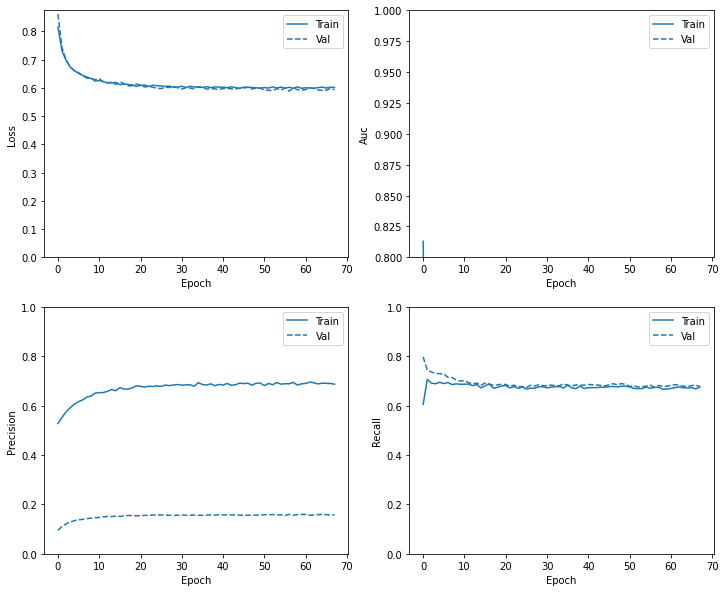

In [61]:
plot_metrics(resampled_history)

loss :  0.5990628600120544
tp :  3361.0
fp :  17910.0
tn :  38651.0
fn :  1581.0
accuracy :  0.6830886006355286
precision :  0.15800856053829193
recall :  0.6800890564918518
auc :  0.7460908889770508

Legitimate Transactions Detected (True Negatives):  38651
Legitimate Transactions Incorrectly Detected (False Positives):  17910
Fraudulent Transactions Missed (False Negatives):  1581
Fraudulent Transactions Detected (True Positives):  3361
Total Fraudulent Transactions:  4942


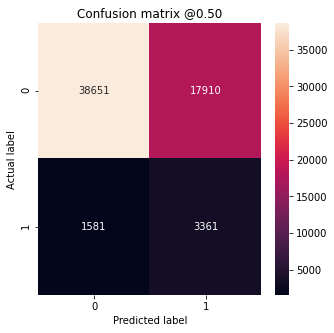

In [62]:
train_predictions_weighted = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
weighted_results = resampled_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)